## Principal Component Analysis

**In Dimesionality Reduction as a rule of thumb:**
- We use **PCA (Principal Component Analysis)** when we just want to reduce the size of the dataset and not trying to derive any meaning from the extracted components.
- We use **FA (Factor Analysis)** when we are trying to find the presence of latent variable (extracted factors) which explains the pattern of observed variables.


In [1]:
# Import important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working directory
os.chdir(r"E:\PGP BA - greatlearning\GitHub\Principal Component Analysis")

In [3]:
# Load dataset
bc = pd.read_csv("breast cancer.csv")

In [4]:
# Check info of dataset
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# Check head of dataset
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Their are no missing values
- Let's drop id column
- Let's seperate diagnosis (target variable)
- In target variable diagnosis - let's change M = '1' and B = '0' 


In [6]:
# In diagnosis replace M = '1' and B = '0'
bc["diagnosis"].replace('M', 1, inplace=True)
bc["diagnosis"].replace('B', 0,inplace=True)

In [7]:
# Set independent and dependent variables
IV = bc.drop(["id", "diagnosis"], axis =1)
DV = bc["diagnosis"]

In [8]:
# Check shape
print(IV.shape)
print(DV.shape)

(569, 30)
(569,)


**Important** 
- PCA should not be done on the entire dataset and as this would cause the dataset to leak thus causing overfitting. 
- Also, we should not perform PCA on train and test separately as the level of variance will be different in both these datasets which will cause the final vectors of these two datasets to have different directions. 
- So, we first divide the dataset into train and test and perform PCA on train dataset and transform the test dataset using that PCA model (which was fitted on the train dataset).

In [9]:
# Do train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(IV, DV, test_size = .30, random_state=0)

In [10]:
# Check shape
print("Independent variables:", x_train.shape, x_test.shape)
print("Dependent variable:", y_train.shape, y_test.shape)

Independent variables: (398, 30) (171, 30)
Dependent variable: (398,) (171,)


In [11]:
# Let's normalize the independent variables
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fit on train set only
scale.fit(x_train)

# Apply transform to both train and test data
train_scaled = scale.transform(x_train)
test_scaled = scale.transform(x_test)

In [12]:
# Let's convert both train and test dataset from numpy array to pandas dataframe
x_train_scaled = pd.DataFrame(train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(test_scaled, columns=x_test.columns)

In [13]:
# Chech head of x_train_scaled
x_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,0.451444,...,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
1,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,0.489386,...,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,-0.053477,...,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716
3,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,-1.225303,...,0.998276,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466
4,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,2.266825,...,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260


In [14]:
# Chech head of x_test_scaled
x_test_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.218553,0.317107,-0.149384,-0.287243,1.016289,0.840148,0.713667,0.823176,1.102786,1.547385,...,0.010159,0.671930,0.161662,-0.083481,1.083204,0.861667,1.254202,1.369985,1.093961,1.515606
1,-0.271417,1.447278,-0.332906,-0.338596,-0.616243,-1.020853,-0.782447,-0.735274,-0.670850,-0.993273,...,-0.405253,1.416262,-0.477842,-0.437692,-0.158056,-0.958356,-0.671121,-0.840956,-0.706868,-0.883103
2,-0.046048,-0.844125,-0.110982,-0.151214,-1.209826,-0.947080,-0.870205,-0.586169,-0.777910,-0.990354,...,-0.292325,-1.013809,-0.325593,-0.343906,-1.268657,-0.988331,-1.066963,-0.503942,-1.192981,-0.926594
3,0.020728,-0.244394,-0.045092,-0.078556,-2.209923,-1.017909,-0.820497,-0.912463,-0.613751,-0.990354,...,-0.028155,-0.044712,-0.056252,-0.124848,-1.658456,-0.238948,-0.580451,-0.608507,-0.403836,-0.387972
4,-0.321500,-0.184660,-0.393137,-0.377110,-0.478100,-1.303191,-0.809351,-0.516978,-1.213290,-0.586125,...,-0.616992,-0.443752,-0.676288,-0.583396,-1.546961,-1.350055,-1.140898,-0.992163,-1.428146,-1.228245


### PCA

In [15]:
# Import library for PCA and use n_components as 30 (total no. of independent variables)
# We can also directly give n_components = .95 (to retain 95% of variance from the dataset), it will select no. of components on its own.
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca_model = pca.fit(x_train_scaled)

In [16]:
# transform train data
pca_train = pca_model.transform(x_train_scaled)
pca_train

array([[-2.17650596e+00,  1.25618056e+00, -7.92598012e-01, ...,
         3.10403125e-02,  3.01245684e-02,  2.87669776e-03],
       [-3.55565312e+00,  8.69992599e-01,  2.40337235e-01, ...,
         4.89829106e-03,  4.63640003e-03,  2.39757398e-03],
       [-2.41910268e+00, -2.42748983e-02, -7.78809805e-01, ...,
        -1.41453023e-02,  8.22867552e-03,  1.11997855e-03],
       ...,
       [-3.21623630e+00,  5.39811811e-01,  4.67434736e-01, ...,
         3.83485159e-02, -4.10938852e-02,  1.60833867e-02],
       [-5.72095067e+00, -5.71962200e-01,  3.84995071e+00, ...,
         1.43256901e-02, -1.58915289e-02,  4.65008288e-03],
       [-1.06325950e+00,  1.39453316e+00,  1.17698027e+00, ...,
        -1.22708662e-02, -2.05899378e-03, -1.13135167e-02]])

In [17]:
x_train_scaled.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# Create component loading matrix
variable_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
matrix = pd.DataFrame(pca_model.components_, columns=variable_names)
component_loadings = np.transpose(matrix)
component_loadings

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
radius_mean,0.221835,-0.228360,-0.003855,-0.049733,0.031282,0.017259,-0.125477,-0.082363,0.174541,-0.141450,...,-0.050991,0.050052,-0.059775,0.084572,0.154460,-0.154085,-0.132970,-0.204315,0.226658,-0.692664
texture_mean,0.098432,-0.052280,0.019284,0.611791,-0.013927,0.042451,-0.003335,-0.117160,-0.231862,-0.111615,...,0.400302,0.012133,0.118737,0.039862,-0.094508,-0.019140,-0.032732,-0.005270,-0.013493,0.000196
perimeter_mean,0.229778,-0.211640,-0.004253,-0.049049,0.030797,0.014050,-0.117739,-0.074665,0.175951,-0.124003,...,-0.041717,0.047621,-0.085619,0.058782,0.062408,-0.149251,-0.101554,-0.045017,0.367922,0.700056
area_mean,0.223599,-0.225715,0.036823,-0.049377,0.000367,-0.008598,-0.046794,-0.099035,0.147183,-0.169096,...,0.011940,0.018225,0.046605,-0.179445,0.030087,0.443071,0.427338,0.239184,-0.424972,0.012254
smoothness_mean,0.143618,0.185221,-0.087331,-0.121946,-0.361583,-0.320525,-0.155175,0.278267,0.079903,0.075296,...,-0.109927,0.170830,0.002094,-0.012803,-0.014503,-0.023104,0.061508,0.012012,-0.005261,0.000742
compactness_mean,0.241720,0.148399,-0.075560,-0.036005,0.005991,-0.023560,0.009381,0.039850,0.150074,0.104143,...,0.234677,-0.218860,-0.211235,0.343560,-0.220982,0.244864,0.057696,-0.023760,-0.029484,-0.035105
concavity_mean,0.261180,0.056321,0.016926,-0.013793,0.077073,-0.020763,-0.102770,0.079181,0.051256,0.054917,...,-0.044325,-0.248583,-0.126913,-0.211320,-0.105783,-0.508000,0.430136,-0.047056,-0.017401,-0.028172
concave points_mean,0.263651,-0.030043,-0.015643,-0.051420,-0.043497,-0.050204,-0.168388,0.077714,0.163497,0.018749,...,-0.142726,-0.211020,0.264865,-0.161731,0.097797,0.324113,-0.491746,0.018242,-0.003630,0.003724
symmetry_mean,0.133443,0.197410,-0.026764,-0.064594,-0.284590,0.371656,-0.186484,0.348577,-0.242900,-0.448272,...,-0.085058,0.016925,0.058762,-0.007746,0.009241,-0.016047,-0.007729,-0.004409,-0.007180,0.000839
fractal_dimension_mean,0.056189,0.366483,-0.024503,-0.037156,-0.047763,-0.140941,0.276402,0.113125,0.146297,-0.169383,...,-0.005091,0.232166,-0.048158,-0.089104,0.263854,-0.091545,-0.069057,0.014802,0.002470,0.003619


In [19]:
# Check Ratio of Variance explained by each component
var = pca_model.explained_variance_ratio_
np.around(var, 3)

array([0.437, 0.194, 0.097, 0.067, 0.055, 0.04 , 0.022, 0.015, 0.014,
       0.011, 0.01 , 0.009, 0.008, 0.005, 0.003, 0.003, 0.002, 0.002,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   ])

- First 7 components are explaining 91% of variance

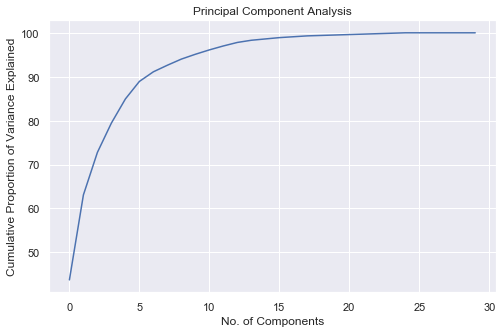

In [20]:
# Plot PCA chart to see visually how many components we must extract 
cumulative_var = np.cumsum(np.around(var, 3)*100)
plt.figure(figsize=(8,5))
plt.plot(cumulative_var)
plt.title("Principal Component Analysis")
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [21]:
# Let's build PCA model with 7 components
pca2 = PCA(n_components=7)
pca_model2 = pca2.fit(x_train_scaled)

In [22]:
# Let's transform train and test data
x_train_pca = pca_model2.transform(x_train_scaled)
x_test_pca = pca_model2.transform(x_test_scaled)

In [23]:
# Lets make dataframe and rename the components from PC_1 to PC_7
x_train_pca = pd.DataFrame(x_train_pca, columns=["PC_" + str(i) for i in range(1,8)])
x_test_pca = pd.DataFrame(x_test_pca, columns=["PC_" + str(i) for i in range(1,8)])

In [24]:
x_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-2.176506,1.256181,-0.792598,-0.788587,0.170341,-0.170074,0.351871
1,-3.555653,0.869993,0.240337,0.420622,-0.603194,-1.811573,-0.281572
2,-2.419103,-0.024275,-0.778810,-0.036293,-0.081180,0.866981,0.085853
3,0.372191,-3.539135,-2.178785,-0.407424,0.724539,0.542518,-0.517974
4,-4.570814,3.441003,-0.148568,-0.888587,-2.895017,-1.186938,1.435464


In [25]:
x_test_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,2.252519,2.043782,-2.297425,0.260237,-0.408207,-0.095500,0.360680
1,-2.809821,-1.677127,-0.352973,2.314407,-0.069339,-0.370985,-0.411767
2,-3.198102,-2.290032,-0.069596,-1.198110,1.139146,-0.137489,-0.301899
3,-2.791870,-2.592625,-0.897939,0.052940,1.580991,1.021488,0.752657
4,-3.790053,-1.446874,1.671213,0.652105,0.052777,0.214345,-0.833153


In [26]:
# Get complete train data
y_train2 = y_train.reset_index(drop=True)
train_data = pd.concat([x_train_pca, y_train2], axis=1)
train_data

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,diagnosis
0,-2.176506,1.256181,-0.792598,-0.788587,0.170341,-0.170074,0.351871,0
1,-3.555653,0.869993,0.240337,0.420622,-0.603194,-1.811573,-0.281572,0
2,-2.419103,-0.024275,-0.778810,-0.036293,-0.081180,0.866981,0.085853,0
3,0.372191,-3.539135,-2.178785,-0.407424,0.724539,0.542518,-0.517974,1
4,-4.570814,3.441003,-0.148568,-0.888587,-2.895017,-1.186938,1.435464,0
...,...,...,...,...,...,...,...,...
393,0.008921,-3.363700,0.381027,-0.419496,0.326312,-0.099456,-1.837968,1
394,6.481806,7.962655,-4.588806,2.957405,2.081421,-0.408077,2.884730,1
395,-3.216236,0.539812,0.467435,0.143646,-0.753202,-1.138438,1.317832,0
396,-5.720951,-0.571962,3.849951,2.600895,-1.005190,1.893637,1.035980,0


In [27]:
# Get complete test data
y_test2 = y_test.reset_index(drop=True)
test_data = pd.concat([x_test_pca, y_test2], axis=1)
test_data

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,diagnosis
0,2.252519,2.043782,-2.297425,0.260237,-0.408207,-0.095500,0.360680,1
1,-2.809821,-1.677127,-0.352973,2.314407,-0.069339,-0.370985,-0.411767,0
2,-3.198102,-2.290032,-0.069596,-1.198110,1.139146,-0.137489,-0.301899,0
3,-2.791870,-2.592625,-0.897939,0.052940,1.580991,1.021488,0.752657,0
4,-3.790053,-1.446874,1.671213,0.652105,0.052777,0.214345,-0.833153,0
...,...,...,...,...,...,...,...,...
166,2.126188,2.492092,-0.884029,0.312491,-1.274471,-1.204832,0.753675,1
167,2.764058,-0.918265,-1.116856,-0.371043,-0.117345,-0.372234,-0.851235,1
168,-0.617681,0.695332,-0.490929,0.029421,-0.080451,-0.588466,0.136243,0
169,-2.510187,-1.199341,0.269585,1.292442,-0.068153,0.623645,-0.212230,0


In [28]:
# Prepare final train test data for modelling
X_train = train_data.drop(["diagnosis"], axis=1)
Y_train = train_data["diagnosis"]
X_test = test_data.drop(["diagnosis"], axis=1)
Y_test = test_data["diagnosis"]

### Logistic Regression

In [29]:
# Run Logistic regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Predict on train data
predict_train = logit.predict(X_train)

In [31]:
# Check Accuracy on train data
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, predict_train)

0.9824120603015075

In [32]:
# Predict on test data
predict_test = logit.predict(X_test)

In [33]:
# Check Accuracy on test data
accuracy_score(Y_test, predict_test)

0.9649122807017544

- Accuracy on train data is 98%
- Accuracy on test data in 96%